  Machine Learning Online Class - Exercise 2: Logistic Regression
                              
  ====================Instructions====================
 
  This file contains code that helps you get started on the logistic regression exercise. 
  You will need to complete the following functions in this exericse:

  sigmoid.m

  costFunction.m

  predict.m

  costFunctionReg.m

  For this exercise, you will not need to change any code in this file,or any other files other than those mentioned above

 Load Data
  The first two columns contains the exam scores and the third column
  contains the label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.optimize as opt

In [2]:
filename='ex2data1.csv';
data1=pd.read_csv(filename,nrows=99,header=None)
data1.columns=['Input1','Input2','Output']
dataX=pd.DataFrame(data=data1[:][:],index=range(0,99),columns=['Input1','Input2'])
dataY=pd.DataFrame(data=data1[:][:],index=range(0,99),columns=['Output'])

 ==================== Part 1: Plotting ====================
 
 We start the exercise by first plotting the data to understand the the problem we are working with.

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



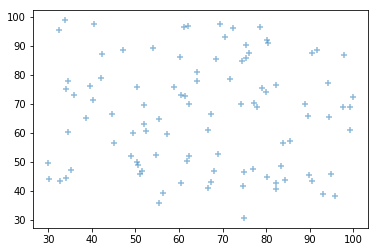

In [3]:
print("Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n");
plt.scatter(x=data1['Input1'],y=data1['Input2'],alpha=0.5,marker='+')
plt.show()

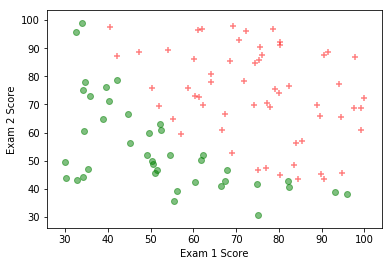

In [4]:
for key,row in data1.iterrows():
    if row['Output']==1:
        plt.scatter(x=row['Input1'],y=row['Input2'],label='Admitted',alpha=0.5,color='red',marker='+')
    elif row['Output']==0:
        plt.scatter(x=row['Input1'],y=row['Input2'],alpha=0.5,color='green',marker='o')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

 ============ Part 2: Compute Cost and Gradient ============

  In this part of the exercise, you will implement the cost and gradient

  for logistic regression. You neeed to complete the code in 

  costFunction.m

  Setup the data matrix appropriately, and add ones for the intercept term

In [5]:
X=dataX.values
y=dataY.values

In [6]:
[m,n]=X.shape
print(m,n)
[p,q]=y.shape
print(p,q)

99 2
99 1


Adding intercept term to the numpy matrix X

In [7]:
M=np.ones((99,1))
print(M.shape)
X=np.concatenate((M,X),axis=1)
print(X.shape)
X=np.array(X)

(99, 1)
(99, 3)


% Initialize fitting parameters

% Compute and display initial cost and gradient

Sigmoid Function

In [8]:
def sigmoid(X,theta):
    z=np.array(X.dot(theta));
    g=np.zeros((z.shape))
    for i in range(0,len(z)):
        g[i]=1/(1+math.exp(-z[i]))   
    return g

Cost Function and Gradient Function merged

In [9]:
def cost(theta,X,y):
    g=sigmoid(X,theta)
    J=0;
    for i in range(0,len(X)):
        J=J-(y[i])*math.log(g[i])-(1-y[i])*math.log(1-g[i])
    return J/len(X)

In [10]:
def grad(theta,X,y):
    g=sigmoid(X,theta)
    grad=np.zeros((theta.shape))
    for i in range(0,len(X)):
        for j in range(0,n+1):
            grad[j]=grad[j]+(g[i]-y[i])*X[i][j];
    return grad/len(X)  

In [11]:
theta=np.array([[-24],[0.2],[0.2]])
print(cost(theta,X,y))
print(grad(theta,X,y))

[0.22053412]
[[0.04333779]
 [2.59226276]
 [2.67366091]]


% Compute and display cost and gradient with non-zero theta

 ============= Part 3: Optimizing using fminunc  =============
 
 In this exercise, you will use a built-in function (fminunc) to find the
 
 optimal parameters theta.

 
 Set options for fminunc

"fminunc" is used to optimize the parameters given functions to compute the cost and the gradients. 
Since we're using Python, we can use SciPy's optimization API to do the same thing.

Helpful Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html

In [12]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=grad, args=(X,y))
print(cost(result[0],X,y))
theta_min = np.array(result[0])
print(theta_min)

[0.20555072]
[-25.15843436   0.2062087    0.20144708]


%% ============== Part 4: Predict and Accuracies ==============
%  After learning the parameters, you'll like to use it to predict the outcomes
%  on unseen data. In this part, you will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and 
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, you will compute the training and test set accuracies of 
%  our model.
%
%  Your task is to complete the code in predict.m

%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 


CALCULATING PROBABLITY FOR SCORE IN Exams as 45,85

In [19]:
test=np.array([[1,45,85]])
prob = sigmoid(test,theta_min)
print(prob)

[0.77625244]


PREDICT

In [60]:
def predict(theta, X,y):
    m = len(X)
    p = np.zeros((m, 1))
    count=0
    for i in range(0,m):
        x=np.array([X[i][:]])
        if(sigmoid(x,theta)>0.5):
            p[i]=1
            if p[i]==y[i]:
                count=count+1
            else:
                continue
        else:
            p[i]=0
            if p[i]==y[i]:
                count=count+1
            else:
                continue
    return count;

In [65]:
p= predict(theta_min, X,y)

Accuracy

In [66]:
print(((p)/len(X))*100)

88.88888888888889
